##Time_Series_Forcasting_Shampoo_Sales
using the ARIMA model

In [1]:
import pandas as pd
import matplotlib.pyplot  as plt

In [2]:
shampoo=pd.read_csv("shampoo_with_exog.csv")

In [3]:
shampoo.head()

,Month,Sales,Inflation
0,1-Jan,266.0,1
1,2-Jan,145.9,3
2,3-Jan,183.1,5
3,4-Jan,119.3,5
4,5-Jan,180.3,4


In [4]:
shampoo.drop('Inflation',axis=1).head()

,Month,Sales
0,1-Jan,266.0
1,2-Jan,145.9
2,3-Jan,183.1
3,4-Jan,119.3
4,5-Jan,180.3


In [5]:
type(shampoo)

pandas.core.frame.DataFrame

In [6]:
##import the csv file as a time series dataset
shampoo1=pd.read_csv('shampoo_with_exog.csv',index_col=[0],parse_dates=True,squeeze=True)

In [7]:
type(shampoo1)

pandas.core.frame.DataFrame

In [8]:
shampoo1.drop('Inflation',axis=1,inplace=True)

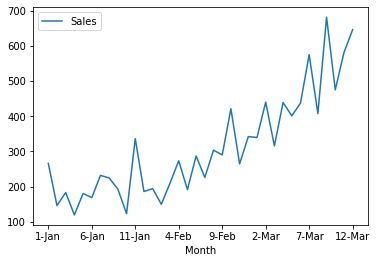

In [9]:
shampoo1.plot()

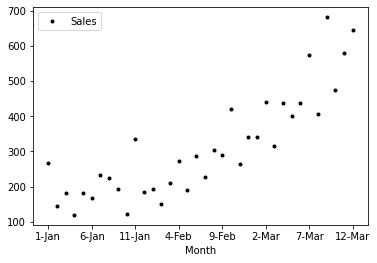

In [10]:
shampoo1.plot(style=' k.')

In [11]:
shampoo1.size

36

In [12]:
shampoo1.describe()

,Sales
count,36.000000
mean,312.600000
std,148.937164
min,119.300000
25%,192.450000
50%,280.150000
75%,411.100000
max,682.000000


In [13]:
shampoo_ma=shampoo1.rolling(10).mean()

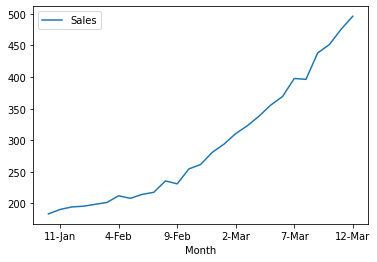

In [14]:
shampoo_ma.plot()

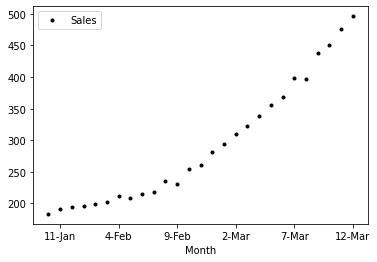

In [15]:
shampoo_ma.plot(style='k.')

In [16]:
shampoo_ma.head

<bound method NDFrame.head of          Sales
Month         
1-Jan      NaN
2-Jan      NaN
3-Jan      NaN
4-Jan      NaN
5-Jan      NaN
6-Jan      NaN
7-Jan      NaN
8-Jan      NaN
9-Jan      NaN
10-Jan  183.51
11-Jan  190.56
12-Jan  194.56
1-Feb   195.68
2-Feb   198.70
3-Feb   201.68
4-Feb   212.16
5-Feb   208.12
6-Feb   214.37
7-Feb   217.69
8-Feb   235.76
9-Feb   231.10
10-Feb  254.67
11-Feb  261.69
12-Feb  280.97
1-Mar   293.93
2-Mar   310.64
3-Mar   323.09
4-Mar   338.32
5-Mar   355.85
6-Mar   369.23
7-Mar   397.79
8-Mar   396.39
9-Mar   438.14
10-Mar  451.44
11-Mar  475.60
12-Mar  496.25>

##Build a naive model (Baseline model)
description:the best prediction for 01/01 for exemple is the value of 02/01(the previouse value)

In [17]:
shampoo_base=pd.concat([shampoo1,shampoo1.shift(1)],axis=1)

In [18]:
shampoo_base.head()

,Sales,Sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [19]:
shampoo_base.columns=['Actual_sales','Forecast_sales']

In [20]:
shampoo_base.head()

,Actual_sales,Forecast_sales
Month,,
1-Jan,266.0,NaN
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3


In [21]:
shampoo_base.dropna(inplace=True)

In [22]:
shampoo_base.head()

,Actual_sales,Forecast_sales
Month,,
2-Jan,145.9,266.0
3-Jan,183.1,145.9
4-Jan,119.3,183.1
5-Jan,180.3,119.3
6-Jan,168.5,180.3


In [23]:
from sklearn.metrics import mean_squared_error
import numpy as np

In [24]:
shampoo_error=mean_squared_error(shampoo_base.Actual_sales,shampoo_base.Forecast_sales)

In [25]:
shampoo_error

11715.388285714285

In [26]:
np.sqrt(shampoo_error)

108.23764726616282

##create another model ARIMA

###ARIMA(p,d,q)
**AR:autoregressive model(p)
**MA:moving average model (q)
**I:integrated model (d)

In [27]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
##plot_acf:to determine the q parameter (MA)
##plot_pacf:to determine the p parameter (AR)


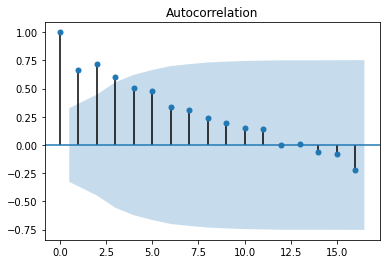

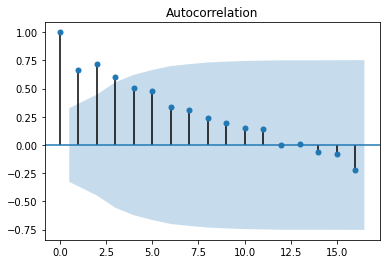

In [28]:
plot_acf(shampoo1)
## q=index of last values out of the critical range
## in this case q=3

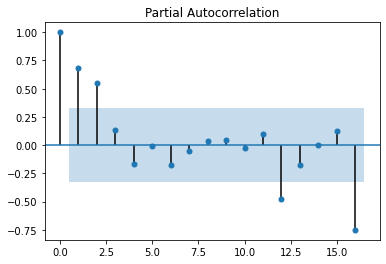

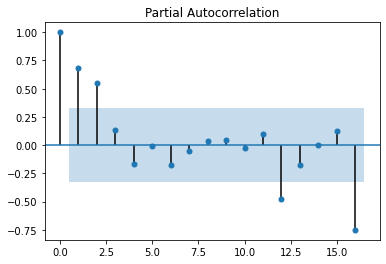

In [29]:
plot_pacf(shampoo1)
## p=index of last values out of the critical range
## in this case p=2

In [30]:
##d between 0-2 to make the series stationnary
from statsmodels.tsa.arima_model import ARIMA

In [31]:
shampoo_train=shampoo1[0:25]
shampoo_test=shampoo1[25:36]

In [32]:
shampoo_model=ARIMA(shampoo_train,order=(3,1,2))

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/arima_model.py:472: FutureWarning: 
statsmodels.tsa.arima_model.ARMA and statsmodels.tsa.arima_model.ARIMA have
been deprecated in favor of statsmodels.tsa.arima.model.ARIMA (note the .
between arima and model) and
statsmodels.tsa.SARIMAX. These will be removed after the 0.12 release.

statsmodels.tsa.arima.model.ARIMA makes use of the statespace framework and
is both well tested and maintained.

To silence this warning and continue using ARMA and ARIMA until they are
removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARMA',
                        FutureWarning)
warnings.filterwarnings('ignore', 'statsmodels.tsa.arima_model.ARIMA',
                        FutureWarning)

  warnings.warn(ARIMA_DEPRECATION_WARN, FutureWarning)
/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:579: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecastin

In [33]:
shampoo_model_fit=shampoo_model.fit()

In [34]:
##The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.
shampoo_model_fit.aic

272.38919480713037

In [35]:
##The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.
##The Akaike information criterion (AIC) is an estimator of prediction error and thereby relative quality of statistical models for a given set of data.
shampoo_forcast=shampoo_model_fit.forecast(steps=11)[0]

In [36]:
print (shampoo_forcast)

[411.99807081 364.11844554 359.39481268 351.27894309 406.97154863
 418.33289192 411.19338547 385.834338   405.32992297 435.87745606
 454.17133015]


In [37]:
print(shampoo_test)

        Sales
Month        
2-Mar   440.4
3-Mar   315.9
4-Mar   439.3
5-Mar   401.3
6-Mar   437.4
7-Mar   575.5
8-Mar   407.6
9-Mar   682.0
10-Mar  475.3
11-Mar  581.3
12-Mar  646.9


In [38]:
np.sqrt(mean_squared_error(shampoo_test,shampoo_forcast))

130.92708018982452

The base line model is better than the ARIMA model 

In [39]:
##choose the best parameters of the ARIMA model
p_values=range(0,5)
d_values=range(0,3)
q_values=range(0,5)

In [40]:
import warnings
warnings.filterwarnings("ignore")


In [41]:
train,test=shampoo1[0:25], shampoo1[25:36]
for i in test.index :
           print(test["Sales"][i])
 

440.4
315.9
439.3
401.3
437.4
575.5
407.6
682.0
475.3
581.3
646.9


In [42]:
for p in p_values:
  for d in d_values:
    for q in q_values:
      order=(p,d,q)
      train,test=shampoo1[0:25], shampoo1[25:36]
      predictions = list()
      # for i in test.index :
      for i in range (len(test)) :
         try:
          model=ARIMA(train,order)
          model_fit=model.fit(disp=0)
          pred_y=model_fit.forecast()[0]
          predictions.append(pred_y)
          # print(predictions)
          # print(predictions[-1][-1])
          # print(test["Sales"][i])
          # print(np.full(1,(test["Sales"][i])))
          #np.full(1,(test["Sales"][i])),predictions[-1]
          error= np.sqrt(mean_squared_error(test,predictions))
          print('ARIMA%s RMSE = %.2f'% (order,error))
         except:
           continue



ARIMA(0, 0, 0) RMSE = 279.20
ARIMA(0, 0, 1) RMSE = 264.80
ARIMA(0, 0, 2) RMSE = 242.01
ARIMA(0, 0, 3) RMSE = 249.06
ARIMA(0, 0, 4) RMSE = 175.85
ARIMA(0, 1, 0) RMSE = 183.98
ARIMA(0, 1, 1) RMSE = 201.63
ARIMA(0, 1, 2) RMSE = 185.77
ARIMA(0, 1, 3) RMSE = 203.63
ARIMA(0, 1, 4) RMSE = 120.22
ARIMA(0, 2, 0) RMSE = 184.44
ARIMA(0, 2, 1) RMSE = 168.50
ARIMA(0, 2, 2) RMSE = 155.64
ARIMA(0, 2, 3) RMSE = 151.74
ARIMA(1, 0, 0) RMSE = 247.30
ARIMA(1, 0, 1) RMSE = 215.71
ARIMA(1, 0, 2) RMSE = 209.58
ARIMA(1, 0, 3) RMSE = 186.70
ARIMA(1, 1, 0) RMSE = 178.01
ARIMA(1, 1, 1) RMSE = 205.37
ARIMA(1, 2, 0) RMSE = 137.28
ARIMA(1, 2, 1) RMSE = 161.65
ARIMA(2, 0, 0) RMSE = 212.72
ARIMA(2, 0, 1) RMSE = 183.71
ARIMA(2, 0, 4) RMSE = 161.79
ARIMA(2, 1, 0) RMSE = 188.38
ARIMA(2, 1, 1) RMSE = 199.08
ARIMA(2, 1, 2) RMSE = 189.43
ARIMA(2, 2, 0) RMSE = 184.46
ARIMA(3, 0, 0) RMSE = 215.24
ARIMA(3, 0, 2) RMSE = 1650.29
ARIMA(3, 1, 0) RMSE = 148.41
ARIMA(3, 1, 1) RMSE = 151.13
ARIMA(3, 1, 2) RMSE = 134.52
ARIMA(3, 1, 4

120.22  is the lowest error ===>ARIMA(0, 1, 4) is the best model